In [1]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
    ENV["PYTHON"] = "python3";
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

using Plots, Random, Distributions, LinearAlgebra, JuliaProbo
gr();

 Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`
┌ Info: Precompiling JuliaProbo [3c270a3a-2612-4193-9bf7-68cd93c8ae26]
└ @ Base loading.jl:1278


┌ Info: Saved animation to 
│   fn = /home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/images/ch05_mcl13.gif
└ @ Plots /home/mamoru/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/images/ch05_mcl13.gif")
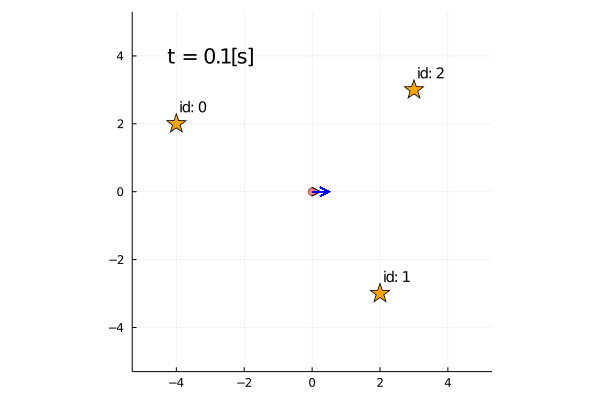

In [2]:
function ch05_mcl13()
    dt = 0.1
    # environment
    xlim = [-5.0, 5.0]
    ylim = [-5.0, 5.0]
    # id of landmark must start from 0 with 1 step
    landmarks = [Landmark([-4.0, 2.0], 0), Landmark([2.0, -3.0], 1), Landmark([3.0, 3.0], 2)]
    envmap = Map()
    push!(envmap, landmarks)
    world = World(xlim, ylim)
    push!(world, envmap)
    # robot side
    initial_pose = [0.0, 0.0, 0.0]
    estimator = Mcl(initial_pose, 100)
    circling_agent = EstimatorAgent(0.2, 10.0*pi/180, dt, estimator)
    robot = RealRobot(initial_pose, circling_agent, RealCamera(landmarks); color="red")
    push!(world, robot)
    anim = @animate for i in 1:300
        t = dt * i
        annota = "t = $(round(t, sigdigits=3))[s]"
        p = draw(world, annota)
        z = observations(robot.sensor_, robot.pose_; noise=true, bias=true)
        v, ω = decision(circling_agent, z, envmap; resample=true)
        state_transition(robot, v, ω, dt; move_noise=true, vel_bias_noise=true)
    end
    gif(anim, "images/ch05_mcl13.gif", fps=10)
end
ch05_mcl13()